In [1]:
from statsbombpy import sb
import math
import pandas as pd
from pandasql import sqldf

In [2]:
columns = [
    'id',
    'match_id',
    'index',
    'minute',
    'second',
    'possession',
    'possession_team_id',
    'possession_team',
    'type',
    'player_id',
    'player',
    'position',
    'team_id',
    'team',
    'location',
    'pass_end_location',
    'pass_outcome',
    'ball_receipt_outcome',
    'pass_recipient_id',
    'pass_recipient',
    'carry_end_location',
    'dribble_outcome',
    'foul_won_advantage',
    'related_events',
    'under_pressure'
]

events = sb.competition_events(
    country="England",
    division= "FA Women's Super League",
    season="2020/2021",
    gender="female"
)[columns]

# events = events[events.match_id.isin([3890305, 3890561, 3890511, 3890515, 3890263, 3890261])] # For 1. Bundesliga

events.head()

/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data acce

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,pass_end_location,pass_outcome,ball_receipt_outcome,pass_recipient_id,pass_recipient,carry_end_location,dribble_outcome,foul_won_advantage,related_events,under_pressure
0,f51b1630-d1a8-4837-97b0-de862f0e299a,3775648,1,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1bbead8d-7790-4898-a765-3cdffeaf966e,3775648,2,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,caa9cf6d-dd46-4bdc-ba4c-f6fc82cb9fa9,3775609,1,0,0,1,968,Arsenal WFC,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f85b9236-3d19-476a-8304-57b74b6416b3,3775609,2,0,0,1,968,Arsenal WFC,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b7f68694-0261-4929-ad96-907e62ec630c,3775633,1,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
matches = sb.matches(competition_id=37, season_id=90)[['match_id', 'competition', 'season', 'match_date', 'home_team', 'home_score', 'away_score', 'away_team']]

# matches = matches[matches.match_id.isin([3890305, 3890561, 3890511, 3890515, 3890263, 3890261])]

matches

/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,competition,season,match_date,home_team,home_score,away_score,away_team
0,3775648,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
1,3775609,England - FA Women's Super League,2020/2021,2021-04-28,Arsenal WFC,2,0,West Ham United LFC
2,3775633,England - FA Women's Super League,2020/2021,2021-02-06,Aston Villa,1,0,Tottenham Hotspur Women
3,3775570,England - FA Women's Super League,2020/2021,2021-03-28,Brighton & Hove Albion WFC,0,5,Everton LFC
4,3775581,England - FA Women's Super League,2020/2021,2021-03-28,Chelsea FCW,2,0,Aston Villa
...,...,...,...,...,...,...,...,...
126,3775608,England - FA Women's Super League,2020/2021,2021-01-17,West Ham United LFC,0,1,Tottenham Hotspur Women
127,3775599,England - FA Women's Super League,2020/2021,2021-04-20,West Ham United LFC,0,0,Aston Villa
128,3775554,England - FA Women's Super League,2020/2021,2020-11-14,Everton LFC,1,1,Reading WFC
129,3775652,England - FA Women's Super League,2020/2021,2021-02-07,Chelsea FCW,1,2,Brighton & Hove Albion WFC


In [8]:
def pass_start_location(x):
    return events[events.id == list(filter(lambda x: events[events.id == x].type.item() == 'Pass', x))[0]].location.item()[0] < 60

In [9]:
ball_receipts = events[(events.type == 'Ball Receipt*') & (events.ball_receipt_outcome.isna()) & (events.position.str.contains('Midfield'))]
ball_receipts = ball_receipts[ball_receipts.location.apply(lambda x: 20 < x[0] < 60)]
ball_receipts = ball_receipts[ball_receipts.related_events.apply(pass_start_location)]
ball_receipts = pd.merge(left = ball_receipts, right = matches, how = 'left', on = 'match_id')

ball_receipts.head()

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,foul_won_advantage,related_events,under_pressure,competition,season,match_date,home_team,home_score,away_score,away_team
0,0e9e4a0c-46ea-4aea-9c62-b4883bf1d993,3775648,9,0,1,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,NaN,[4467e274-205f-41be-ab7e-62ece2697dbc],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
1,eab2985b-c33f-40fd-9a8a-02bc356a0a8e,3775648,15,0,6,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,NaN,[51af8ad7-5652-4717-9547-796fd8212fcf],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
2,fe6cf834-bb08-4497-85dc-29f66ac5a744,3775648,46,0,31,3,2647,Aston Villa,Ball Receipt*,46539.0,...,NaN,[5cd79af7-7929-4b2b-a3a7-9d9f839db461],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
3,be59c93a-1476-4512-b90f-b02435b31ba0,3775648,57,0,40,4,968,Arsenal WFC,Ball Receipt*,10650.0,...,NaN,[6ebcfd9e-39ed-490b-a120-c8a92c1a1c44],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
4,94ab09b3-ae11-4630-8a70-35c5116348d0,3775648,61,0,44,4,968,Arsenal WFC,Ball Receipt*,10658.0,...,NaN,[9674c1be-0675-499b-9328-82ec1f5fcc39],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC


In [10]:
data = dict()
for receipt in ball_receipts.itertuples():
    event_dict = dict()
    event_count = 0
    final_location_x = receipt.location[0]
    players = set()
    dribble = False
    last_carry_start_location = receipt.location
    last_carry_distance = 0
    possession_events = events[(events.match_id == receipt.match_id) & (events.possession == receipt.possession) & (events['index'] > receipt.index)].sort_values('index')
    for event in possession_events.itertuples():
        if final_location_x >= 80 or event_count == 4 or len(players) == 2:
            break
        else:
            if event.type == 'Pass' and pd.isna(event.pass_outcome):
                event_count += 1
                final_location_x = event.pass_end_location[0]
                players.add(event.player_id)
            elif dribble == False and event.type == 'Carry':
                if math.dist(event.location, event.carry_end_location) > 5.46807:
                    event_count += 1
                final_location_x = event.carry_end_location[0]
                players.add(event.player_id)
                last_carry_start_location = event.location
                last_carry_distance = math.dist(event.location, event.carry_end_location)
            elif event.type in ['Dispossessed', 'Miscontrol', 'Interception', 'Clearance', 'Block', 'Shot'] \
            or (event.type == 'Pass' and pd.notna(event.pass_outcome)) \
            or (event.type == 'Dribble' and event.dribble_outcome == 'Incomplete') \
            or (event.type == 'Foul Won' and pd.isna(event.foul_won_advantage)):
                break
            elif event.type == 'Dribble' and event.dribble_outcome == 'Complete':
                dribble = True
            elif dribble == True and event.type == 'Carry':
                if last_carry_distance <= 5.46807 and math.dist(last_carry_start_location, event.carry_end_location) > 5.46807:
                    event_count += 1
                final_location_x = event.carry_end_location[0]
                dribble = False
                last_carry_distance = math.dist(last_carry_start_location, event.carry_end_location)
            else:
                continue
    event_dict['successful_transition'] = True if final_location_x >= 80 else False
    event_dict['transition_final_location_x'] = final_location_x
    event_dict['transition_event_count'] = event_count 
    event_dict['transition_players_involved'] = len(players)
    data[receipt.id] = event_dict

In [93]:
results = pd.merge(
    left = ball_receipts,
    right = pd.DataFrame.from_dict(data=data, orient='index').reset_index().rename(columns = {'index': 'id'}),
    how = 'left',
    on = 'id'
)

results.head()

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,season,match_date,home_team,home_score,away_score,away_team,successful_transition,transition_final_location_x,transition_event_count,transition_players_involved
0,0e9e4a0c-46ea-4aea-9c62-b4883bf1d993,3775648,9,0,1,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,40.3,1,2
1,eab2985b-c33f-40fd-9a8a-02bc356a0a8e,3775648,15,0,6,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,63.4,2,2
2,fe6cf834-bb08-4497-85dc-29f66ac5a744,3775648,46,0,31,3,2647,Aston Villa,Ball Receipt*,46539.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,72.1,2,2
3,be59c93a-1476-4512-b90f-b02435b31ba0,3775648,57,0,40,4,968,Arsenal WFC,Ball Receipt*,10650.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,43.9,2,2
4,94ab09b3-ae11-4630-8a70-35c5116348d0,3775648,61,0,44,4,968,Arsenal WFC,Ball Receipt*,10658.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,80.6,2,2


In [12]:
results[(results.successful_transition == True)]

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,season,match_date,home_team,home_score,away_score,away_team,successful_transition,transition_final_location_x,transition_event_count,transition_players_involved
4,94ab09b3-ae11-4630-8a70-35c5116348d0,3775648,61,0,44,4,968,Arsenal WFC,Ball Receipt*,10658.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,80.6,2,2
5,072ef743-ae86-4051-829f-2c4e07f82c38,3775648,136,2,29,7,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,83.2,2,1
25,3878c561-fb3d-4e3e-bddd-d94fb1296ff0,3775648,1283,29,26,50,2647,Aston Villa,Ball Receipt*,46539.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,82.0,2,1
31,bfe6145f-0d9f-4c44-a80f-b82a8fe1c4c4,3775648,1793,43,15,70,2647,Aston Villa,Ball Receipt*,10193.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,88.8,3,2
48,ceda4210-5a87-4dfc-8b5b-342c3a78c314,3775648,2409,56,42,104,2647,Aston Villa,Ball Receipt*,15565.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,81.2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,596e1261-c2c5-4242-8ba3-76e12763f71c,3764238,1772,49,34,98,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2020-09-12,West Ham United LFC,1,9,Arsenal WFC,True,80.4,3,2
10749,68602696-3c20-40b9-86e0-b06bacd3378e,3764238,2348,64,6,122,972,West Ham United LFC,Ball Receipt*,5076.0,...,2020/2021,2020-09-12,West Ham United LFC,1,9,Arsenal WFC,True,91.9,2,1
10750,d6057780-f734-4f8b-a188-4edbe4fa9a96,3764238,2400,67,10,129,972,West Ham United LFC,Ball Receipt*,5076.0,...,2020/2021,2020-09-12,West Ham United LFC,1,9,Arsenal WFC,True,85.2,2,1
10754,4f6f53e8-c65b-4bbc-9602-623a27e36640,3764238,2577,72,53,139,968,Arsenal WFC,Ball Receipt*,10658.0,...,2020/2021,2020-09-12,West Ham United LFC,1,9,Arsenal WFC,True,82.0,2,2


In [13]:
df = results[['id', 'player_id', 'player', 'position', 'team_id', 'team', 'under_pressure', 'successful_transition', 'transition_players_involved']]

df.head()

,id,player_id,player,position,team_id,team,under_pressure,successful_transition,transition_players_involved
0,0e9e4a0c-46ea-4aea-9c62-b4883bf1d993,10405.0,Lia Wälti,Center Defensive Midfield,968,Arsenal WFC,NaN,False,2
1,eab2985b-c33f-40fd-9a8a-02bc356a0a8e,10405.0,Lia Wälti,Center Defensive Midfield,968,Arsenal WFC,NaN,False,2
2,fe6cf834-bb08-4497-85dc-29f66ac5a744,46539.0,Nadine Hanssen,Right Center Midfield,2647,Aston Villa,NaN,False,2
3,be59c93a-1476-4512-b90f-b02435b31ba0,10650.0,Jill Roord,Left Center Midfield,968,Arsenal WFC,NaN,False,2
4,94ab09b3-ae11-4630-8a70-35c5116348d0,10658.0,Danielle van de Donk,Right Center Midfield,968,Arsenal WFC,NaN,True,2


In [16]:
sqldf(
    '''
    SELECT 
        CAST(player_id AS INT) AS player_id,
        player,
        team_id,
        team,
        COUNT(id) AS total_receptions,
        COUNT(CASE WHEN successful_transition = TRUE THEN id END) AS total_successful_transitions,
        ROUND(COUNT(CASE WHEN successful_transition = TRUE THEN id END) * 100.0 / COUNT(id), 2) AS successful_transition_pct
    FROM df
    GROUP BY 1, 2, 3, 4
    ORDER BY 5 DESC, 4 DESC
    '''
)

,player_id,player,team_id,team,total_receptions,total_successful_transitions,successful_transition_pct
0,4658,Keira Walsh,746,Manchester City WFC,436,22,5.05
1,15577,Angharad James,974,Reading WFC,393,20,5.09
2,4645,Isobel Mary Christiansen,967,Everton LFC,392,23,5.87
3,10405,Lia Wälti,968,Arsenal WFC,375,21,5.60
4,4647,So-Yun Ji,971,Chelsea FCW,302,33,10.93
...,...,...,...,...,...,...,...
159,18254,Megan Finnigan,967,Everton LFC,1,0,0.00
160,32403,Emma Wilhelmina Koivisto,965,Brighton & Hove Albion WFC,1,0,0.00
161,46716,Rianna Jarrett,965,Brighton & Hove Albion WFC,1,0,0.00
162,85004,Maisie Symonds,965,Brighton & Hove Albion WFC,1,0,0.00


In [17]:
sqldf(
    '''
    SELECT 
        CAST(player_id AS INT) AS player_id,
        player,
        team_id,
        team,
        COUNT(id) AS total_receptions,
        COUNT(CASE WHEN successful_transition = TRUE THEN id END) AS total_successful_transitions,
        ROUND(COUNT(CASE WHEN successful_transition = TRUE THEN id END) * 100.0 / COUNT(id), 2) AS successful_transition_pct,
        COUNT(CASE WHEN successful_transition = TRUE AND transition_players_involved = 1 THEN id END) AS total_successful_solo_transitions,
        ROUND(
            COUNT(
                CASE WHEN successful_transition = TRUE AND transition_players_involved = 1 THEN id END) * 100.0 
                / COUNT(CASE WHEN successful_transition = TRUE THEN id END
            )
            , 2
        ) AS successful_solo_transition_pct
    FROM df
    GROUP BY 1, 2, 3, 4
    ORDER BY 8 DESC
    '''
)

,player_id,player,team_id,team,total_receptions,total_successful_transitions,successful_transition_pct,total_successful_solo_transitions,successful_solo_transition_pct
0,4647,So-Yun Ji,971,Chelsea FCW,302,33,10.93,22,66.67
1,31540,Katie Zelem,1475,Manchester United,297,22,7.41,17,77.27
2,15549,Sophie Louise Ingle,971,Chelsea FCW,143,18,12.59,16,88.89
3,5016,Jessica Fishlock,974,Reading WFC,241,20,8.30,14,70.00
4,10188,Caroline Weir,746,Manchester City WFC,197,18,9.14,13,72.22
...,...,...,...,...,...,...,...,...,...
159,50193,Anouk Denton,972,West Ham United LFC,1,0,0.00,0,NaN
160,61467,Jessica Naz,749,Tottenham Hotspur Women,4,0,0.00,0,NaN
161,77717,Olivia McLoughlin,2647,Aston Villa,27,0,0.00,0,NaN
162,82429,Maisy Barker,972,West Ham United LFC,2,0,0.00,0,NaN


In [18]:
import requests
from io import StringIO

In [20]:
source = requests.get('https://fbref.com/en/comps/189/2020-2021/playingtime/2020-2021-Womens-Super-League-Stats')
fbref = pd.read_html(io=StringIO(source.text.replace('<!--','').replace('-->','')))[2].droplevel(level=0, axis=1)[['Player', 'Pos', 'Min']]
fbref.head()

,Player,Pos,Min
0,Angela Addison,FW,1270
1,Asmita Ale,DF,1457
2,Flo Allen,DF,1086
3,Jonna Andersson,DF,1563
4,Mackenzie Arnold,GK,1440


In [23]:
min_played = sqldf(
    '''
    SELECT 
        player,
        SUM(CAST(COALESCE(Min, 0) AS INT)) AS minutes_played
    FROM fbref
    GROUP BY 1
    '''
)
min_played.head()

,Player,minutes_played
0,Abbey-Leigh Stringer,695
1,Abbi Grant,38
2,Abbie Cowie,0
3,Abbie McManus,1305
4,Abby Dahlkemper,645


In [25]:
results = sqldf(
    '''
    SELECT 
        CAST(player_id AS INT) AS player_id,
        player,
        COUNT(id) AS total_receptions,
        COUNT(CASE WHEN successful_transition = TRUE THEN id END) AS total_successful_transitions,
        COUNT(CASE WHEN successful_transition = TRUE AND transition_players_involved = 1 THEN id END) AS total_successful_solo_transitions
    FROM df
    GROUP BY 1, 2
    '''
)
results.head()

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions
0,4638,Drew Spence,41,5,2
1,4641,Francesca Kirby,13,1,1
2,4643,Georgia Stanway,73,2,2
3,4645,Isobel Mary Christiansen,392,23,12
4,4646,Claire Emslie,15,4,3


In [37]:
summary = sqldf(
    '''
    SELECT 
        r.*,
        mp.minutes_played
    FROM 
        results r
        LEFT JOIN
        min_played mp
        ON r.player = mp.player
    '''
)

In [38]:
summary

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played
0,4638,Drew Spence,41,5,2,249.0
1,4641,Francesca Kirby,13,1,1,NaN
2,4643,Georgia Stanway,73,2,2,1489.0
3,4645,Isobel Mary Christiansen,392,23,12,NaN
4,4646,Claire Emslie,15,4,3,1289.0
...,...,...,...,...,...,...
155,61029,Ivana Fuso,3,1,1,100.0
156,61467,Jessica Naz,4,0,0,418.0
157,77717,Olivia McLoughlin,27,0,0,608.0
158,82429,Maisy Barker,2,0,0,NaN


In [41]:
summary[summary.minutes_played.isna()].to_csv('sb.csv')
min_played.to_csv('fbref.csv')

In [42]:
mmp = pd.read_csv('missing_minutes_played.csv')
mmp

,player_id,player,minutes_played
0,4641,Francesca Kirby,1378
1,4645,Isobel Mary Christiansen,1917
2,4647,So-Yun Ji,1307
3,4657,Anita Amma Ankyewah Asante,1659
4,4846,Lucia Leon,245
5,4865,Josie Green,1003
6,4949,Rosemary Kathleen Lavelle,466
7,4961,Samantha May Kerr,1517
8,5016,Jessica Fishlock,1601
9,5076,Emily Louise van Egmond,1792


In [43]:
summary = sqldf(
    '''
    SELECT 
        r.*,
        COALESCE(mp.minutes_played, mmp.minutes_played) AS minutes_played
    FROM 
        results r
        LEFT JOIN
        min_played mp
        ON r.player = mp.player
        LEFT JOIN 
        mmp
        ON r.player_id = mmp.player_id
    '''
)

summary

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played
0,4638,Drew Spence,41,5,2,249
1,4641,Francesca Kirby,13,1,1,1378
2,4643,Georgia Stanway,73,2,2,1489
3,4645,Isobel Mary Christiansen,392,23,12,1917
4,4646,Claire Emslie,15,4,3,1289
...,...,...,...,...,...,...
155,61029,Ivana Fuso,3,1,1,100
156,61467,Jessica Naz,4,0,0,418
157,77717,Olivia McLoughlin,27,0,0,608
158,82429,Maisy Barker,2,0,0,94


In [44]:
summary[summary.minutes_played.isna()]

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played


In [50]:
summary[summary.minutes_played.notna()].sort_values('total_successful_transitions', ascending=False)

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played
5,4647,So-Yun Ji,302,33,22,1307
3,4645,Isobel Mary Christiansen,392,23,12,1917
8,4658,Keira Walsh,436,22,10,1776
109,31540,Katie Zelem,297,22,17,1268
33,10405,Lia Wälti,375,21,13,1567
...,...,...,...,...,...,...
75,16395,Victoria Williams,7,0,0,1354
68,15725,Natasha Harding,14,0,0,1917
64,15704,Lily Woodham,6,0,0,896
59,15620,Katie McCabe,4,0,0,1735


In [51]:
summary['total_receptions_p90'] = round((summary.total_receptions * 1.0 / summary.minutes_played) * 90, 1)
summary['total_successful_transitions_p90'] = round((summary.total_successful_transitions * 1.0 / summary.minutes_played) * 90, 1)
summary['total_total_successful_solo_transitions_p90'] = round((summary.total_successful_solo_transitions * 1.0 / summary.minutes_played) * 90, 1)


In [53]:
summary.sort_values('total_successful_transitions_p90', ascending=False).head(10)

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played,total_receptions_p90,total_successful_transitions_p90,total_total_successful_solo_transitions_p90
5,4647,So-Yun Ji,302,33,22,1307,20.8,2.3,1.5
0,4638,Drew Spence,41,5,2,249,14.8,1.8,0.7
30,10251,Fara Williams,195,19,9,1088,16.1,1.6,0.7
109,31540,Katie Zelem,297,22,17,1268,21.1,1.6,1.2
41,15549,Sophie Louise Ingle,143,18,16,1226,10.5,1.3,1.2
26,10172,Jill Scott,223,17,10,1235,16.3,1.2,0.7
33,10405,Lia Wälti,375,21,13,1567,21.5,1.2,0.7
120,31713,Maéva Clemaron,103,7,3,544,17.0,1.2,0.5
76,16397,Chloe Peplow,38,2,1,156,21.9,1.2,0.6
3,4645,Isobel Mary Christiansen,392,23,12,1917,18.4,1.1,0.6


In [ ]:
# minimum 5 games or 450 minutes (>=)

In [87]:
summary.total_successful_solo_transitions.max()

22

In [55]:
import matplotlib.pyplot as plt
import numpy as np

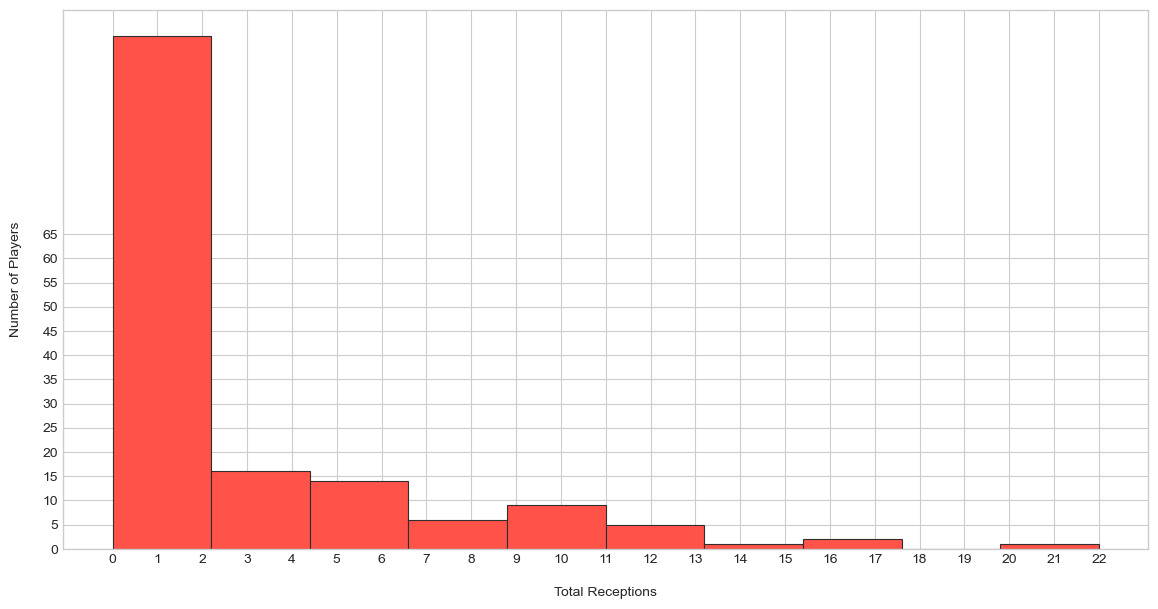

In [92]:
plt.figure(figsize=(14, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(x=summary.total_successful_solo_transitions, bins=10, facecolor='#FF5349', edgecolor='#2E2E2E', linewidth=0.8)

plt.xticks(np.arange(0, 22 + 1, 1))
plt.yticks(np.arange(0, 65 + 1, 5))
# plt.title('Distribution of Cancelled Discounted MRP %')
plt.xlabel('Total Receptions', labelpad=15)
plt.ylabel('Number of Players', labelpad=15)

plt.show()

In [77]:
print('PERCENTILE VALUES FOR MINUTES PLAYED\n')
print('95th percentile : ', np.percentile(a=summary.minutes_played, q=95))
print('90th percentile : ', np.percentile(a=summary.minutes_played, q=90))
print('80th percentile : ', np.percentile(a=summary.minutes_played, q=80))
print('70th percentile : ', np.percentile(a=summary.minutes_played, q=70))
print('60th percentile : ', np.percentile(a=summary.minutes_played, q=60))
print('50th percentile : ', np.percentile(a=summary.minutes_played, q=50))
print('40th percentile : ', np.percentile(a=summary.minutes_played, q=40))
print('30th percentile : ', np.percentile(a=summary.minutes_played, q=30))
print('20th percentile : ', np.percentile(a=summary.minutes_played, q=20))
print('10th percentile : ', np.percentile(a=summary.minutes_played, q=10))


PERCENTILE VALUES FOR MINUTES PLAYED

95th percentile :  1863.3999999999996
90th percentile :  1664.3999999999996
80th percentile :  1440.4
70th percentile :  1304.2
60th percentile :  1221.8
50th percentile :  1014.5
40th percentile :  865.2
30th percentile :  685.5
20th percentile :  521.0
10th percentile :  237.9


In [79]:
round((len(summary[summary.minutes_played >= 450]) / len(summary)) * 100, 2)

82.5

In [76]:
print('PERCENTILE VALUES FOR TOTAL RECEPTIONS\n')
print('95th percentile : ', np.percentile(a=summary.total_receptions, q=95))
print('90th percentile : ', np.percentile(a=summary.total_receptions, q=90))
print('80th percentile : ', np.percentile(a=summary.total_receptions, q=80))
print('70th percentile : ', np.percentile(a=summary.total_receptions, q=70))
print('60th percentile : ', np.percentile(a=summary.total_receptions, q=60))
print('50th percentile : ', np.percentile(a=summary.total_receptions, q=50))
print('40th percentile : ', np.percentile(a=summary.total_receptions, q=40))
print('30th percentile : ', np.percentile(a=summary.total_receptions, q=30))

PERCENTILE VALUES FOR TOTAL RECEPTIONS

95th percentile :  242.39999999999952
90th percentile :  182.0
80th percentile :  129.20000000000002
70th percentile :  84.0
60th percentile :  46.79999999999994
50th percentile :  25.0
40th percentile :  14.0
30th percentile :  7.0


<Axes: xlabel='total_receptions_p90', ylabel='total_successful_transitions_p90'>

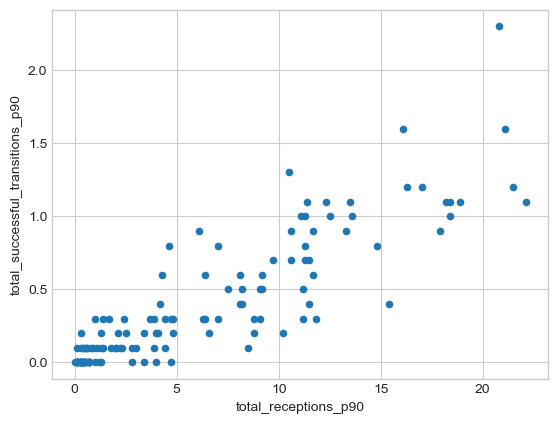

In [85]:
summary[summary.minutes_played >= 450].plot.scatter(x='total_receptions_p90', y='total_successful_transitions_p90')

In [94]:
results[(results.player_id == 4647) & (results.successful_transition == True)]

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,season,match_date,home_team,home_score,away_score,away_team,successful_transition,transition_final_location_x,transition_event_count,transition_players_involved
345,109b8241-c100-442b-9c75-b1789185ea02,3775581,1273,34,3,70,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2021-03-28,Chelsea FCW,2,0,Aston Villa,True,80.8,2,1
356,50e49a52-ad29-48d9-a9d7-dfbee3a12e20,3775581,2004,49,31,108,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2021-03-28,Chelsea FCW,2,0,Aston Villa,True,82.5,3,2
379,3dd9d6cd-24a2-44af-a249-d9fbb6f5ac3c,3775581,2722,69,26,158,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2021-03-28,Chelsea FCW,2,0,Aston Villa,True,87.2,2,2
384,b83ffb29-f54f-48c1-abbf-f2323bd225df,3775581,2847,72,54,164,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2021-03-28,Chelsea FCW,2,0,Aston Villa,True,81.7,1,1
2183,b177d36a-eea8-4b46-bff4-f080d6a3bc33,3764232,970,22,22,57,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2020-09-06,Manchester United,1,1,Chelsea FCW,True,83.5,3,2
2191,d049a3a2-70ad-4cd6-83c8-1794abe308de,3764232,1033,24,20,59,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2020-09-06,Manchester United,1,1,Chelsea FCW,True,110.7,2,1
2229,ae6bcdce-7a60-4072-a0a1-440f2b684cd8,3764232,2125,50,25,116,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2020-09-06,Manchester United,1,1,Chelsea FCW,True,80.3,3,2
2449,07522aa0-e8c6-42e2-a78a-f0df74d96412,3775606,2862,78,5,176,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2021-01-10,Reading WFC,0,5,Chelsea FCW,True,88.3,2,1
2459,3e525093-32f6-4910-afed-3805d77ccb2e,3775606,3255,89,34,198,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2021-01-10,Reading WFC,0,5,Chelsea FCW,True,98.9,3,2
2512,40932d6c-e250-457e-968e-907ba61fe1a5,3775567,2027,55,20,130,971,Chelsea FCW,Ball Receipt*,4647.0,...,2020/2021,2021-01-17,Chelsea FCW,2,1,Manchester United,True,80.5,3,2


In [98]:
# 3775611	2235	55	2	122
# 3775611	2287	56	32	124
m_id = 3775611
p = 124
events[(events.match_id == m_id) & (events.possession == p)].sort_values('index')


,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,pass_end_location,pass_outcome,ball_receipt_outcome,pass_recipient_id,pass_recipient,carry_end_location,dribble_outcome,foul_won_advantage,related_events,under_pressure
393206,f701f457-156f-453a-8856-d81ffcb333ba,3775611,2283,56,19,124,971,Chelsea FCW,Ball Recovery,15560.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289686,9a77913e-6b17-42ea-99b3-a32ad6ba238b,3775611,2284,56,19,124,971,Chelsea FCW,Carry,15560.0,...,NaN,NaN,NaN,NaN,NaN,"[15.6, 39.1]",NaN,NaN,"[6d4c59e8-856c-46a8-8197-a0f017abeb76, 9ff54b6...",True
354476,9ff54b63-169a-4d63-82ae-4e840e3c7d36,3775611,2285,56,25,124,971,Chelsea FCW,Pressure,10180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[9a77913e-6b17-42ea-99b3-a32ad6ba238b],NaN
71599,6d4c59e8-856c-46a8-8197-a0f017abeb76,3775611,2286,56,29,124,971,Chelsea FCW,Pass,15560.0,...,"[52.4, 33.0]",NaN,NaN,4647.0,So-Yun Ji,NaN,NaN,NaN,[6670d08a-1c66-4d52-b7cc-2673dc8f2cf5],NaN
187325,6670d08a-1c66-4d52-b7cc-2673dc8f2cf5,3775611,2287,56,32,124,971,Chelsea FCW,Ball Receipt*,4647.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[6d4c59e8-856c-46a8-8197-a0f017abeb76],NaN
289687,338ae7b0-66e7-4816-8b9c-ad47c9d8e2f6,3775611,2288,56,32,124,971,Chelsea FCW,Carry,4647.0,...,NaN,NaN,NaN,NaN,NaN,"[53.9, 38.4]",NaN,NaN,"[6670d08a-1c66-4d52-b7cc-2673dc8f2cf5, a1aabf2...",NaN
71600,a1aabf27-fc6d-4101-ad72-7ed27144d115,3775611,2289,56,33,124,971,Chelsea FCW,Pass,4647.0,...,"[103.3, 64.9]",NaN,NaN,4641.0,Francesca Kirby,NaN,NaN,NaN,[773e1fdf-9889-4507-b909-4289cf960646],NaN
354477,b877e52c-ae1f-4efc-a948-0c77a42da69a,3775611,2290,56,37,124,971,Chelsea FCW,Pressure,4651.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[773e1fdf-9889-4507-b909-4289cf960646, 8147414...",NaN
187326,773e1fdf-9889-4507-b909-4289cf960646,3775611,2291,56,37,124,971,Chelsea FCW,Ball Receipt*,4641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[a1aabf27-fc6d-4101-ad72-7ed27144d115, b877e52...",True
289688,81474142-c3f5-482f-9719-81cfa2420916,3775611,2292,56,37,124,971,Chelsea FCW,Carry,4641.0,...,NaN,NaN,NaN,NaN,NaN,"[105.9, 63.5]",NaN,NaN,"[773e1fdf-9889-4507-b909-4289cf960646, b877e52...",True
